In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
#import the countries data from the csv file with an index column of countries
df_cubesat = pd.read_csv("Feb7_Feb28_CubeSat_Data.csv")
#timestamp column to datetime 
df_cubesat['timestamp'] = pd.to_datetime(df_cubesat['timestamp'])
df_cubesat = df_cubesat.resample('H', on ='timestamp', axis=0).sum()
# df_cubesat = df_ground.resample('H', on ='timestamp', axis=0).mean()
df_cubesat.head()


,Chan_0_1,Chan_0_2,Chan_1_2
timestamp,,,
2024-02-07 14:00:00,1126.0,811,1181
2024-02-07 15:00:00,3439.0,2406,3615
2024-02-07 16:00:00,3534.0,2452,3694
2024-02-07 17:00:00,3612.0,2508,3703
2024-02-07 18:00:00,3408.0,2371,3563


In [4]:
#ratio the sum of chan_0_1 and chan_0_2 and chan_1_2 to find one singular line
# df_combined['Chan_0_1'] = df_combined['Chan_0_1'] / df_combined['Chan_0_2']
# df_combined['Chan_1_2'] = df_combined['Chan_1_2'] / df_combined['Chan_0_2']
# df_combined = df_combined.drop(columns=['Chan_0_2'])
# df_combined.head()

#ratio all channel datas together to find one singular line
df_cubesat['Chan_0_1'] = df_cubesat['Chan_0_1'] / df_cubesat['Chan_0_2']
df_cubesat['Chan_0_1'] = df_cubesat['Chan_0_1'] / df_cubesat['Chan_1_2']
df_cubesat = df_cubesat.drop(columns=['Chan_0_2'])
df_cubesat = df_cubesat.drop(columns=['Chan_1_2'])
df_cubesat.head()

,Chan_0_1
timestamp,
2024-02-07 14:00:00,0.001176
2024-02-07 15:00:00,0.000395
2024-02-07 16:00:00,0.000390
2024-02-07 17:00:00,0.000389
2024-02-07 18:00:00,0.000403


In [12]:
#drop the first and last hour of data from the cubesat data
df_cubesat = df_cubesat.iloc[1:]
df_cubesat = df_cubesat.iloc[:-1]
df_cubesat.head()

#find the percentage value of the data
df_cubesat['Chan_0_1'] = df_cubesat['Chan_0_1'] * 100
df_cubesat.head()

,Chan_0_1
timestamp,
2024-02-07 16:00:00,0.039017
2024-02-07 17:00:00,0.038893
2024-02-07 18:00:00,0.040342
2024-02-07 19:00:00,0.038339
2024-02-07 20:00:00,0.038837


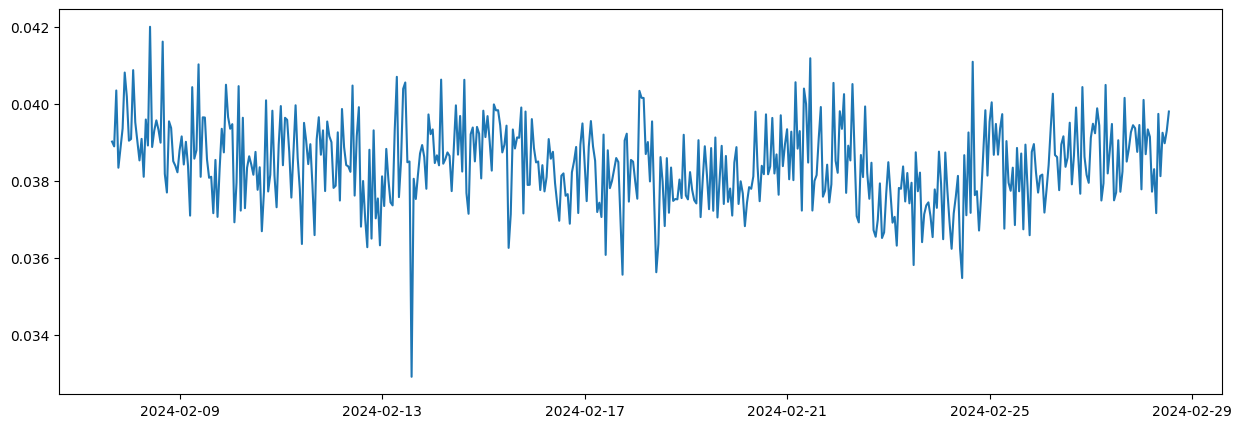

In [13]:
#plot Chan_0_1
plt.figure(figsize=(15, 5))
plt.plot(df_cubesat['Chan_0_1'])

In [25]:
df_weather = pd.read_csv("AW_Feb7_Feb28.csv")
#timestamp column to datetime
df_weather['timestamp'] = pd.to_datetime(df_weather['Simple_Date'])
df_weather = df_weather.set_index('timestamp')
df_weather = df_weather.drop(columns=['Date'])
df_weather = df_weather.drop(columns=['Simple_Date'])
# Resample to hourly data points
df_weather = df_weather.resample('H').mean()
# df_weather = df_weather.resample('H').sum()
# View the first few rows of the resampled dataframe
#print(df_weather.head())

#combined both datasets on the timestamp index
df_combined = pd.concat([df_cubesat, df_weather], axis=1, join='outer')
df_combined.dropna(inplace=True)
df_combined.head()

,Chan_0_1,Outdoor_Temperature,Wind_Speed,Wind_Gust,Max_Daily_Gust,Wind_Direction,Hourly_Rain_(in/hr),Event_Rain,Daily_Rain,Weekly_Rain,Monthly_Rain,Yearly_Rain,Relative_Pressure_(inHg),Humidity_(%),Ultra-Violet_Radiation_Index,Solar_Radiation_(W/m^2),Avg_Wind_Direction,Absolute_Pressure_(inHg)
timestamp,,,,,,,,,,,,,,,,,,
2024-02-07 16:00:00,0.039017,59.108333,0.091667,0.275000,8.1,191.583333,0.0,0.0,0.0,0.58,0.58,74.37,30.134167,33.833333,0.0,43.891667,29.168333,1.0
2024-02-07 17:00:00,0.038893,57.133333,0.058333,0.091667,8.1,178.750000,0.0,0.0,0.0,0.58,0.58,74.37,30.140000,35.500000,0.0,14.033333,29.175000,1.0
2024-02-07 18:00:00,0.040342,53.533333,0.000000,0.000000,8.1,179.000000,0.0,0.0,0.0,0.58,0.58,74.37,30.141667,39.250000,0.0,0.900000,29.178333,1.0
2024-02-07 19:00:00,0.038339,52.041667,0.058333,0.091667,8.1,179.000000,0.0,0.0,0.0,0.58,0.58,74.37,30.140000,42.500000,0.0,0.000000,29.171667,1.0
2024-02-07 20:00:00,0.038837,50.566667,0.016667,0.091667,8.1,175.750000,0.0,0.0,0.0,0.58,0.58,74.37,30.152500,45.416667,0.0,0.000000,29.185000,1.0


In [26]:
#scale temperature to a percent value
df_combined['Outdoor_Temperature'] = df_combined['Outdoor_Temperature'] / 100
df_combined.head()

# #scale relative pressure to a percent value
# df_combined['Relative_Pressure_(inHg)'] = df_combined['Relative_Pressure_(inHg)'] / 100
# df_combined.head()

#scale pressure by ratio of absolute against relative
df_combined['Relative_Pressure_(inHg)'] = df_combined['Absolute_Pressure_(inHg)'] / df_combined['Relative_Pressure_(inHg)']
df_combined.head()

,Chan_0_1,Outdoor_Temperature,Wind_Speed,Wind_Gust,Max_Daily_Gust,Wind_Direction,Hourly_Rain_(in/hr),Event_Rain,Daily_Rain,Weekly_Rain,Monthly_Rain,Yearly_Rain,Relative_Pressure_(inHg),Humidity_(%),Ultra-Violet_Radiation_Index,Solar_Radiation_(W/m^2),Avg_Wind_Direction,Absolute_Pressure_(inHg)
timestamp,,,,,,,,,,,,,,,,,,
2024-02-07 16:00:00,0.039017,0.591083,0.091667,0.275000,8.1,191.583333,0.0,0.0,0.0,0.58,0.58,74.37,0.033185,33.833333,0.0,43.891667,29.168333,1.0
2024-02-07 17:00:00,0.038893,0.571333,0.058333,0.091667,8.1,178.750000,0.0,0.0,0.0,0.58,0.58,74.37,0.033179,35.500000,0.0,14.033333,29.175000,1.0
2024-02-07 18:00:00,0.040342,0.535333,0.000000,0.000000,8.1,179.000000,0.0,0.0,0.0,0.58,0.58,74.37,0.033177,39.250000,0.0,0.900000,29.178333,1.0
2024-02-07 19:00:00,0.038339,0.520417,0.058333,0.091667,8.1,179.000000,0.0,0.0,0.0,0.58,0.58,74.37,0.033179,42.500000,0.0,0.000000,29.171667,1.0
2024-02-07 20:00:00,0.038837,0.505667,0.016667,0.091667,8.1,175.750000,0.0,0.0,0.0,0.58,0.58,74.37,0.033165,45.416667,0.0,0.000000,29.185000,1.0


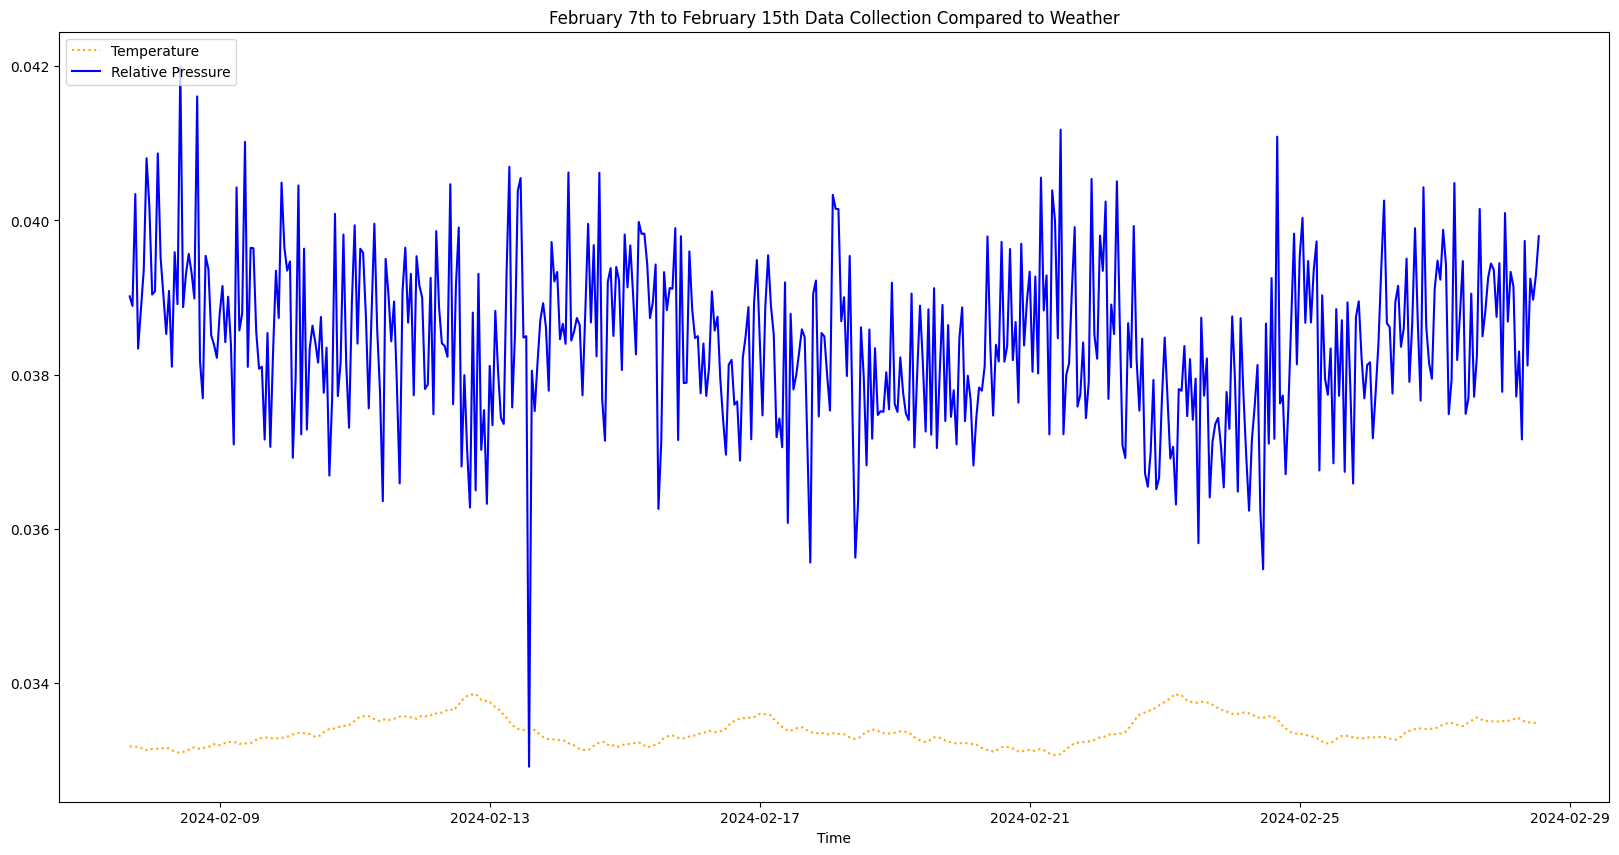

In [27]:
#plot the figure with multiple axes
fig, ax1 = plt.subplots(figsize=(20,10))
#plot average counts on the first axis
#ax1.plot(df_combined.index, df_combined['average'], color='blue')
ax1.set_xlabel('Time')
#ax1.set_ylabel('Average Counts', color='blue')
#plot humidity on the second axis
#ax1.plot(df_combined.index, df_combined['Humidity_(%)'], color='red',linestyle='dashed')
#ax2.set_ylabel('Humidity', color='red')
#plot temperature on the third axis
# #ax1.plot(df_combined.index, df_combined['Outdoor_Temperature'], color='green',linestyle='dashdot')
#ax3.set_ylabel('Temperature', color='green')
#plot pressure on the fourth axis
ax1.plot(df_combined.index, df_combined['Relative_Pressure_(inHg)'], color='orange',linestyle='dotted')
# ax1.plot(df_combined.index, df_combined['Chan_0_1'], color='blue', )
ax1.plot(df_combined.index, df_combined['Chan_0_1'], color='blue')
# ax1.plot(df_co6mbined.index, df_combined['Chan_0_2'], color='pink')
# ax1.plot(df_combined.index, df_combined['Chan_1_2'], color='purple')
#set the title
ax1.set_title('February 7th to February 15th Data Collection Compared to Weather')
#set the legend
ax1.legend(['Temperature', 'Relative Pressure', 'Sum of Conicidence Counts'], loc='upper left')


In [45]:
#import the countries data from the csv file with an index column of countries
df_ground= pd.read_csv("Rm415SA-Pi3crm001-E5-Oct5_2024_02_13_to_02_28.csv")
#timestamp column to datetime 
df_ground['timestamp'] = pd.to_datetime(df_ground['timestamp'])
df_ground = df_ground.resample('H', on ='timestamp', axis=0).sum()
# df_cubesat = df_cubesat.resample('H', on ='timestamp', axis=0).mean()

df_ground.head()


,Chan_0_1,Chan_0_2,Chan_1_2
timestamp,,,
2024-02-13 17:00:00,6623,3224,6645
2024-02-13 18:00:00,10123,5018,10413
2024-02-13 19:00:00,10164,4949,10333
2024-02-13 20:00:00,9959,4899,10226
2024-02-13 21:00:00,10415,5109,10413


In [46]:
#ratio the sum of chan_0_1 and chan_0_2 and chan_1_2 to find one singular line
# df_combined['Chan_0_1'] = df_combined['Chan_0_1'] / df_combined['Chan_0_2']
# df_combined['Chan_1_2'] = df_combined['Chan_1_2'] / df_combined['Chan_0_2']
# df_combined = df_combined.drop(columns=['Chan_0_2'])
# df_combined.head()

# #ratio all channel datas together to find one singular line
# df_ground['Chan_0_1'] = df_ground['Chan_0_1'] / df_ground['Chan_0_2']
# df_ground['Chan_0_1'] = df_ground['Chan_0_1'] / df_ground['Chan_1_2']
# df_ground = df_ground.drop(columns=['Chan_0_2'])
# df_ground = df_ground.drop(columns=['Chan_1_2'])
# df_ground.head()

#ratio the channels by taking the sum of all three and then dividing each channel by the sum
df_ground['Chan_0_1'] = df_ground['Chan_0_1'] / (df_ground['Chan_0_1'] + df_ground['Chan_0_2'] + df_ground['Chan_1_2'])
df_ground['Chan_0_2'] = df_ground['Chan_0_2'] / (df_ground['Chan_0_1'] + df_ground['Chan_0_2'] + df_ground['Chan_1_2'])
df_ground['Chan_1_2'] = df_ground['Chan_1_2'] / (df_ground['Chan_0_1'] + df_ground['Chan_0_2'] + df_ground['Chan_1_2'])
#sum the channels to one value
df_ground['Chan_0_1'] = df_ground['Chan_0_1'] + df_ground['Chan_0_2'] + df_ground['Chan_1_2']
#drop the individual channels
df_ground = df_ground.drop(columns=['Chan_0_2'])
df_ground = df_ground.drop(columns=['Chan_1_2'])
df_ground.head()


,Chan_0_1
timestamp,
2024-02-13 17:00:00,1.728145
2024-02-13 18:00:00,1.721253
2024-02-13 19:00:00,1.723201
2024-02-13 20:00:00,1.720848
2024-02-13 21:00:00,1.730617


In [47]:
#drop the first and last hour of data from the cubesat data
df_ground = df_ground.iloc[1:]
df_ground = df_ground.iloc[:-1]
df_ground.head()

,Chan_0_1
timestamp,
2024-02-13 18:00:00,1.721253
2024-02-13 19:00:00,1.723201
2024-02-13 20:00:00,1.720848
2024-02-13 21:00:00,1.730617
2024-02-13 22:00:00,1.726349


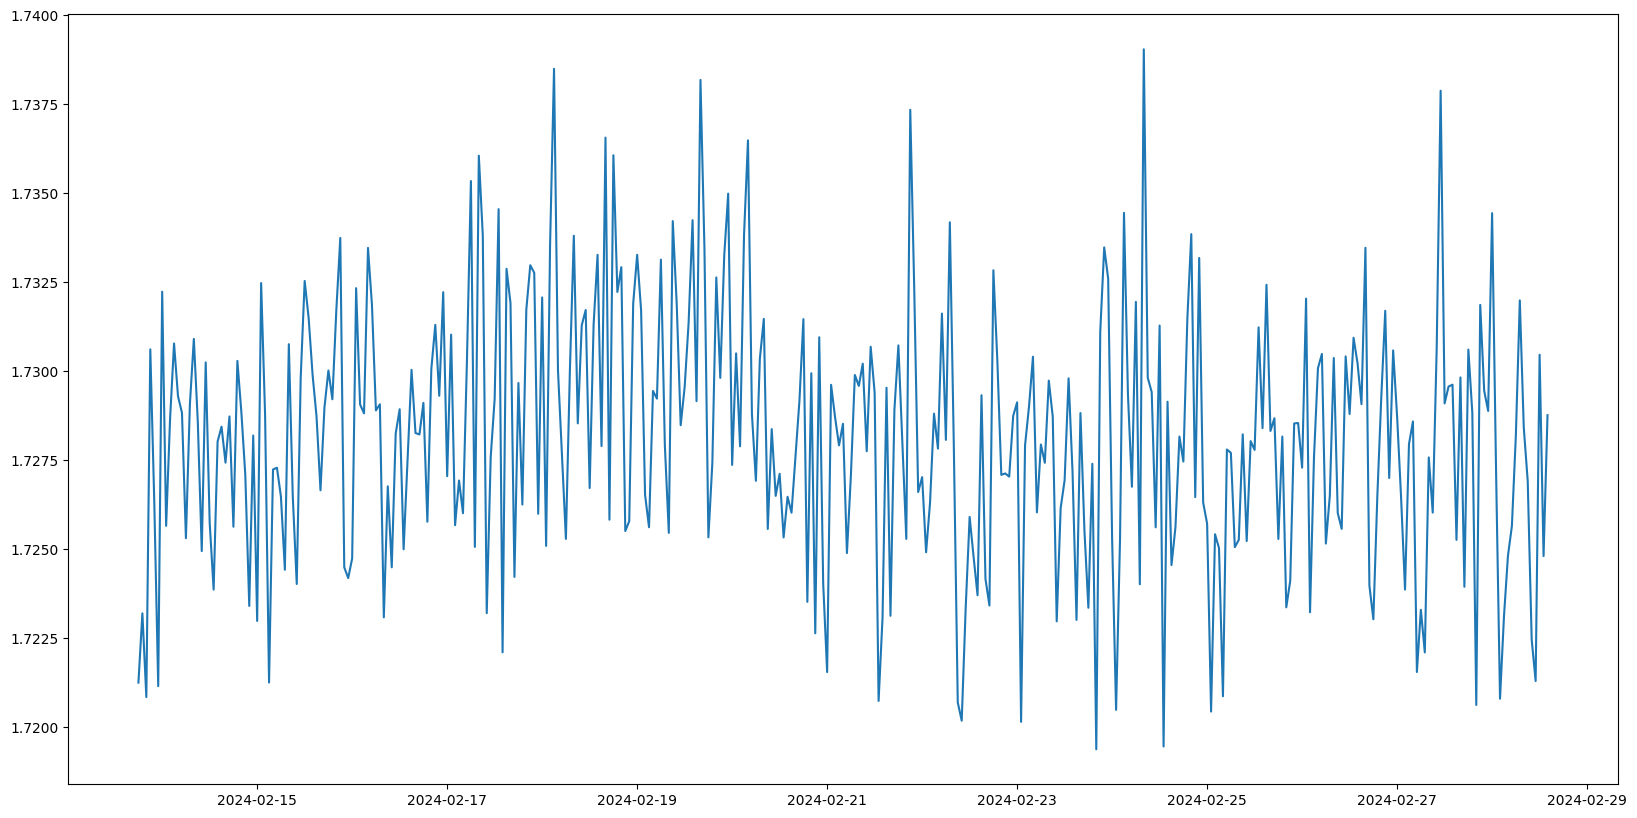

In [48]:
#plot Chan_0_1 on a figure of size (20,15)
plt.figure(figsize=(20, 10))
plt.plot(df_ground['Chan_0_1'])